In [147]:
# 必要に応じて
# !pip install --upgrade pip
# !pip install numpy scikit-learn tensorflow matplotlib pillow pandas

In [148]:
# 機械学習のライブラリ関連をインポート
import pandas as pd
import numpy as np

# ランダムにシャッフルして，学習・テストに分割するモジュール
from sklearn.model_selection import ShuffleSplit

# 深層学習のライブラリをインポート
import tensorflow as tf
import tensorflow.keras as keras

#表示系のインポートと設定
%matplotlib inline
import matplotlib.pyplot as plt

# ファイル操作
import os

# 画像操作
from PIL import Image

# 時間取得
import datetime

In [149]:
# DIRS
DATASET_NUM = 10000
DIRS_DATASET = "../Training/Datasets" + str(DATASET_NUM) + "/"

In [150]:
file_names = []
    
# フォルダ内のファイルを取得
files = os.listdir(DIRS_DATASET)

# ファイル名を配列に格納
for file in files:
    file_names.append(file)

# Pythonリスト型をnumpy.ndarray型に変換
file_names = np.array(file_names)


In [151]:
file_names

array(['4510033397528.jpeg', '4510050634699.jpeg', '4510072948944.jpeg',
       ..., '4999988925606.jpeg', '4999998682512.jpeg',
       '4999999421189.jpeg'], dtype='<U18')

### 画像をnumpy配列にするための関数

In [152]:
def jpeg_to_numpy(image_path):
    # JPEG画像を開く
    image = Image.open(image_path)
    # NumPy配列に変換
    numpy_array = np.array(image)
    
    return numpy_array

def convert_to_grayscale(numpy_array):
    # グレーと言わず2値化
    grayscale_array = np.where(numpy_array <= 128, 0, 255)
    # plt.imshow(grayscale_array) # こいつらのせいで処理が重かった。出力系は要注意
    # print(grayscale_array)
    return grayscale_array


### 画像を配列にしてよしなに

In [153]:
X, y = [], []

In [154]:
for file_name in file_names:
    numpy_array = jpeg_to_numpy(DIRS_DATASET + file_name)
    grayscale_array = convert_to_grayscale(numpy_array)
    for i in range(13):
        grayscale_array1 = np.where(np.all(grayscale_array == [0, 0, 0], axis=-1), 0, 255)
        grayscale_array2 = np.where(grayscale_array1 == 255, i+1, 0)
        X.append(grayscale_array2)
        y.append(file_name[i])

In [155]:
X = np.array(X)
X = X.squeeze()
y = np.array(y, dtype=int)

In [156]:
X

array([[ 0,  1,  0, ...,  1,  1,  0],
       [ 0,  2,  0, ...,  2,  2,  0],
       [ 0,  3,  0, ...,  3,  3,  0],
       ...,
       [ 0, 11,  0, ..., 11, 11,  0],
       [ 0, 12,  0, ..., 12, 12,  0],
       [ 0, 13,  0, ..., 13, 13,  0]])

In [157]:
y

array([4, 5, 1, ..., 1, 8, 9])

In [158]:
# ラベルデータをone-hotベクトルに直す
labels = {
    0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    4: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
    6: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    7: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    8: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
    9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
}

y = np.array(list(map(lambda v : labels[v] , y)))

In [159]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

### データの分割

In [160]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.8,  # 学習
                  test_size =0.2,  # テスト
                  random_state=0)  # 乱数種（再現用）

# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [161]:
X

array([[ 0,  1,  0, ...,  1,  1,  0],
       [ 0,  2,  0, ...,  2,  2,  0],
       [ 0,  3,  0, ...,  3,  3,  0],
       ...,
       [ 0, 11,  0, ..., 11, 11,  0],
       [ 0, 12,  0, ..., 12, 12,  0],
       [ 0, 13,  0, ..., 13, 13,  0]])

In [162]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [163]:
X_train.shape[0], X_train.shape[1]

(104000, 112)

In [164]:
X_train

array([[ 0,  3,  0, ...,  3,  3,  0],
       [ 0,  1,  0, ...,  1,  1,  0],
       [ 0,  2,  0, ...,  2,  2,  0],
       ...,
       [ 0, 13,  0, ..., 13, 13,  0],
       [ 0,  5,  0, ...,  5,  5,  0],
       [ 0,  6,  0, ...,  6,  6,  0]])

### ニューラルネットワークの構築

In [165]:

# 学習し、テストデータで評価し、スコアを表示する
# 引数は、中間層の数、バッチサイズ、epoch数

def fit_epoch(neuron, batch, epochs, ckpt_period):
    ver_name = "231229-v3"
    
    # チェックポイントの設定
    dt_now = datetime.datetime.now()
    checkpoint_path = "./training_ckpt_v" + ver_name + "_d" + str(DATASET_NUM) + "_n" + str(neuron)  + "_b" + str(batch) + "_e" + str(epochs) + "_" + dt_now.strftime('%Y%m%d%H%M%S') + "/cp-{epoch:06d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        verbose=1,
        save_weights_only=True,
        period=ckpt_period  # 重みをckpt_periodエポックごとに保存します
    )


    # レイヤーのオブジェクトを作成
    Dense = keras.layers.Dense

    # モデルの構造を定義
    model = keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(112, )))
    model.add(Dense(neuron, activation='relu'))
    
    # 畳み込み層を追加
    # model.add(tf.keras.layers.Flatten(tf.keras.layers.Conv2D(filters=neuron, kernel_size=(3, 3), activation='relu', input_shape=(1, 112, 3))))

    model.add(Dense(10, activation='softmax')) # 10つのラベルがありsoftmaxで最後の層作る

    # モデルを構築
    model.compile(
        loss='categorical_crossentropy',
        optimizer='Adamax',
        metrics=['accuracy']
    )

    # 必要に応じてチェックポイントから再開
    # model.load_weights("")

    # 学習を実行
    hist = model.fit(X_train, y_train,
        batch_size=batch, # 誤差逆伝播法をするときの1回当たりのデータ数
        epochs=epochs,
        callbacks=[cp_callback],
        verbose=1,
        validation_split=0.1)
    
   # モデルを評価
    score = model.evaluate(X_test, y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])
    
     # 学習の様子をグラフへ描画 
    # 正解率の推移をプロット
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ロスの推移をプロット
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [166]:
print(DATASET_NUM)

10000


Epoch 1/4000
2925/2925 [==============================] - 9s 3ms/step - loss: 2.4241 - accuracy: 0.1745 - val_loss: 2.2184 - val_accuracy: 0.2035
Epoch 2/4000
2925/2925 [==============================] - 9s 3ms/step - loss: 2.1459 - accuracy: 0.2332 - val_loss: 2.1006 - val_accuracy: 0.2454
Epoch 3/4000
2925/2925 [==============================] - 7s 3ms/step - loss: 2.0736 - accuracy: 0.2507 - val_loss: 2.0729 - val_accuracy: 0.2511
Epoch 4/4000
2925/2925 [==============================] - 8s 3ms/step - loss: 2.0467 - accuracy: 0.2552 - val_loss: 2.0358 - val_accuracy: 0.2589
Epoch 5/4000
2925/2925 [==============================] - 8s 3ms/step - loss: 2.0019 - accuracy: 0.2592 - val_loss: 1.9834 - val_accuracy: 0.2623
Epoch 6/4000
2925/2925 [==============================] - 8s 3ms/step - loss: 1.9606 - accuracy: 0.2823 - val_loss: 1.9548 - val_accuracy: 0.2942
Epoch 7/4000
2925/2925 [==============================] - 8s 3ms/step - loss: 1.9374 - accuracy: 0.2972 - val_loss: 1.9334 -

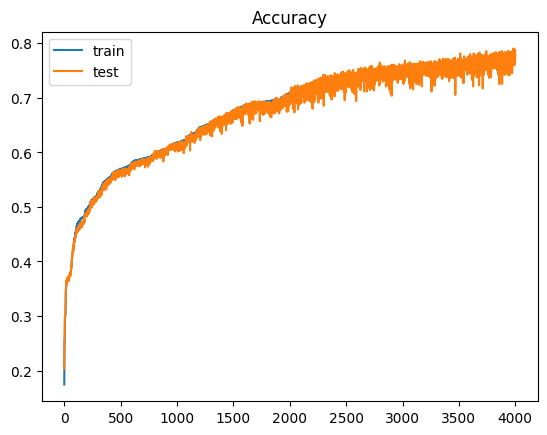

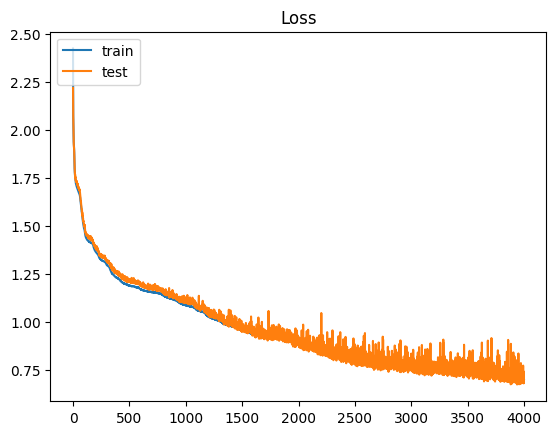

CPU times: total: 41min 21s
Wall time: 6h 17min 48s


In [168]:
%%time
fit_epoch(64, 32, 4000, 50)